In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris



In [22]:
dataset=pd.read_csv("Crop_recommendation.csv",index_col=None)

In [23]:
df=dataset

In [24]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [20]:
iris = load_iris()
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1['target'] = iris.target


In [25]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [26]:
from sklearn.preprocessing import LabelEncoder
#encoding
label_enc=LabelEncoder()
df['label_encoded']=label_enc.fit_transform(df['label'])


In [27]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [ ]:
# Print all label mappings
for index, label in enumerate(le.classes_):
    print(f"{label} --> {index}")

In [ ]:
df.label.value_counts()

In [ ]:
df.columns

In [34]:
independent=df[['N','P','K','rainfall']]

In [35]:
independent

,N,P,K,rainfall
0,90,42,43,202.935536
1,85,58,41,226.655537
2,60,55,44,263.964248
3,74,35,40,242.864034
4,78,42,42,262.717340
...,...,...,...,...
2195,107,34,32,177.774507
2196,99,15,27,127.924610
2197,118,33,30,173.322839
2198,117,32,34,127.175293


In [48]:
dependent=df[['label_encoded']]

In [49]:
dependent

,label_encoded
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [29]:
df.shape

(2200, 9)

In [53]:
dep=np.ravel(dependent)

In [54]:
dep

array([20, 20, 20, ...,  5,  5,  5])

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dep,test_size=0.30,random_state=0)

In [56]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:

classifier=RandomForestClassifier(n_estimators = 100, random_state = 42)

classifier.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [58]:
Y_pred=classifier.predict(X_test)

Accuracy: 92.58%


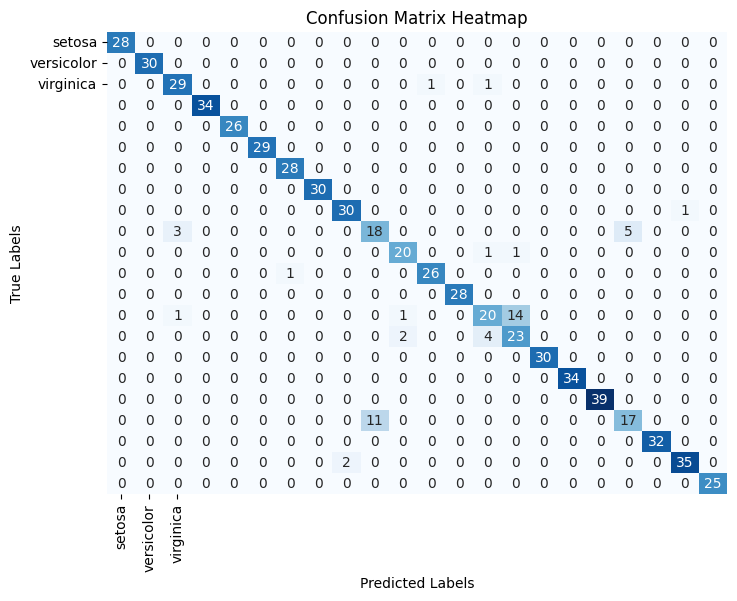

In [64]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [61]:
import pickle

In [62]:
loaded_model=pickle.load(open("finalized_model_Forest.sav",'rb'))
result=loaded_model.predict([[117,32,34,26.272418,52.127394,6.758793,127.]])

C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [71]:
result=result.reshape(-1)

In [72]:
result

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [74]:
df['color_decoded'] = label_enc.inverse_transform(result)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'